## 使用cv2和Image对于图片进行处理, 并观察其对应效果
    OpenCV 和 Pillow 是进行图片处理常用的两个库
    一下是使用其内部函数的一些例子以及对应效果展示
    一个比较基础的概念: cv2读取的图片是bgr&numpy格式; Image读取的图片是Pil格式

In [1]:
import os,sys
import math
import numpy as np
import cv2
from PIL import Image
from PIL import ImageEnhance
from matplotlib import pyplot as plt
import time

In [2]:
sys.path.append(os.pardir)
par_dir = os.path.abspath(os.path.dirname(os.getcwd())+os.path.sep+".")
image_dir = par_dir+'/car_plate_rec/浙F79W39.jpg'

### 1.1 cv2读取图片

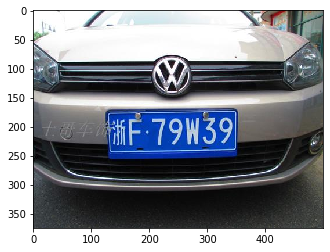

In [3]:
# BGR
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Convert from BGR to GRAY
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# GRAYSCALE
# img = cv2.imread(image_dir,cv2.IMREAD_GRAYSCALE)
# HSV
# img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
plt.imshow(img)

### 1.2 Image读取图片

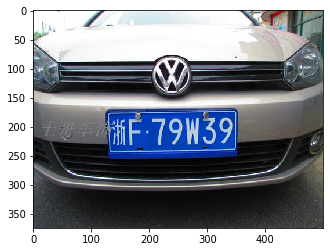

In [4]:
# RGB
img = Image.open(image_dir)
# Convert from RGB to GRAY
# img = img.convert('L')
plt.imshow(img)

### 1.3 cv2与Image相互转换

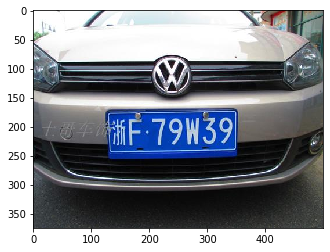

In [5]:
# cv2 to Image
img = cv2.imread(image_dir)
# 将BGR转化成RGB
img = Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.imshow(img)

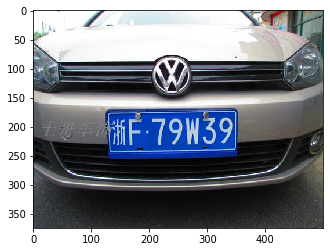

In [6]:
# Image to cv2
img = Image.open(image_dir)
img = np.asarray(img)
# 将RGB转化成BGR
# img = cv2.cvtColor(np.asarray(img),cv2.COLOR_RGB2BGR)
plt.imshow(img)

### 2. cv2图像灰度拉伸

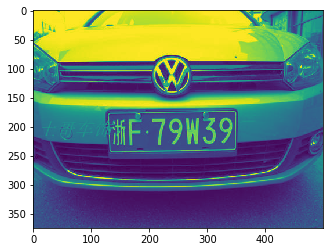

In [7]:
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
maxi=float(img.max())
mini=float(img.min())
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i,j]=(255/(maxi-mini)*img[i,j]-(255*mini)/(maxi-mini))
plt.imshow(img)

### 3.1 图像二值化 cv2

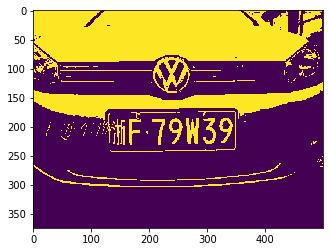

In [11]:
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
maxi=float(img.max())
mini=float(img.min())
x=maxi-((maxi-mini)/2)
maxi=float(img.max())
mini=float(img.min())
threshold=maxi-((maxi-mini)/2)
ret,thresh=cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)
img = thresh
plt.imshow(img)

### 3.2 图像二值化 Image

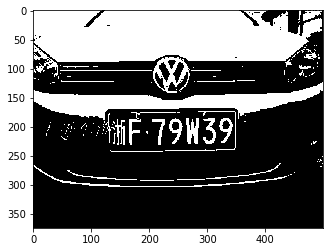

In [10]:
img = Image.open(image_dir)
img = img.convert('L')
threshold = 128
table = []
for i in range(256):
    if i < threshold:
        table.append(0)
    else:
        table.append(1)

img = img.point(table,'1')
plt.imshow(img)

### 3.3 cv2加入Otsu自适应阈值的二值化

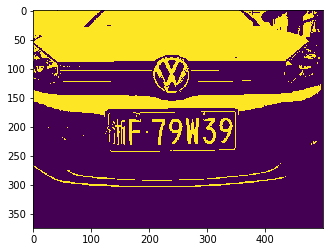

In [14]:
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
img = thresh
plt.imshow(img)

### 4.1. cv2图像翻转

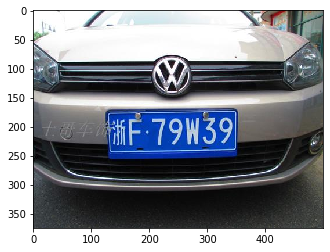

In [9]:
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.flip(img,1)  # 大于0 水平翻转
img = cv2.flip(img,0)  # 等于0 垂直翻转
img = cv2.flip(img,-1) # 小于0 水平且垂直翻转
plt.imshow(img)

### 4.2. Image图像翻转

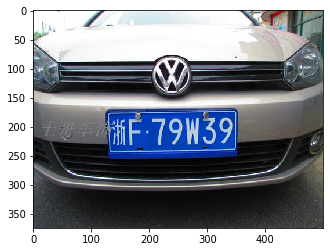

In [10]:
img = Image.open(image_dir)
img = img.transpose(Image.FLIP_LEFT_RIGHT) # 水平翻转
img = img.transpose(Image.FLIP_TOP_BOTTOM) # 垂直翻转
img = img.transpose(Image.ROTATE_180) # 水平且垂直翻转
plt.imshow(img)

### 5. ImageEnhance对图像进行亮度、色度、对比度、锐度处理

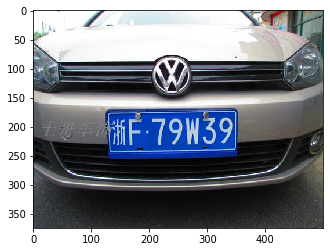

In [11]:
# 原图
img = Image.open(image_dir)
plt.imshow(img)

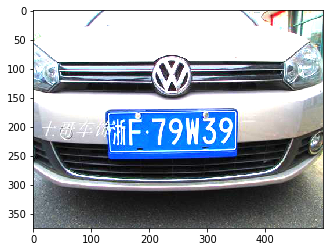

In [12]:
# 亮度增强
img = Image.open(image_dir)
enh_bri = ImageEnhance.Brightness(img)
bright = 2
img = enh_bri.enhance(bright)
plt.imshow(img)

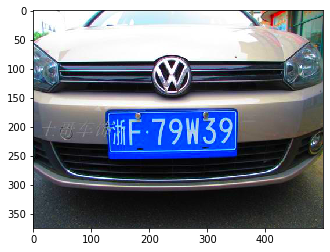

In [13]:
# 色度增强
img = Image.open(image_dir)
enh_col = ImageEnhance.Color(img)
color = 2
img = enh_col.enhance(color)
plt.imshow(img)

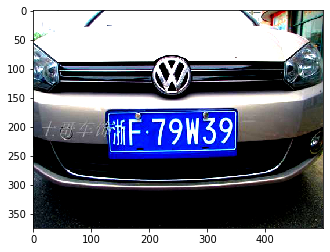

In [14]:
# 对比度增强
img = Image.open(image_dir)
enh_con = ImageEnhance.Contrast(img)
contrast = 2
img = enh_con.enhance(contrast)
plt.imshow(img)

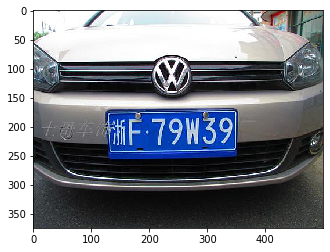

In [15]:
# 锐度增强
img = Image.open(image_dir)
enh_shp = ImageEnhance.Sharpness(img)
sharp = 2
img = enh_shp.enhance(sharp)
plt.imshow(img)

### 6. cv2图像背景分离以及颜色反转

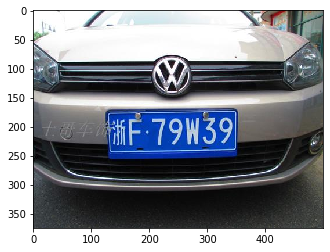

In [110]:
# 原图
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

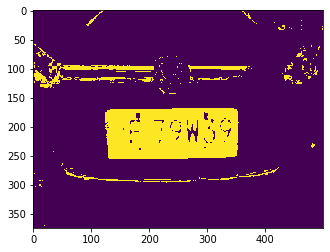

In [111]:
# 背景分离
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower = np.array([100, 50, 50])
upper = np.array([140, 255, 255])
img = cv2.inRange(img, lowerb=lower, upperb=upper) # 将 <lower的值变为0 and >upper的值变为0
plt.imshow(img)

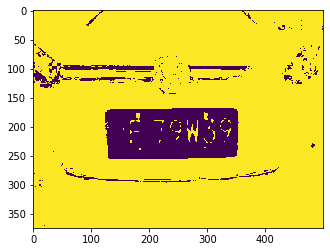

In [112]:
# 颜色反转
y = img.shape[0]
x = img.shape[1]
for i in range(y):
    for j in range(x):
        img[i][j] = 255 - img[i][j]
plt.imshow(img)

### 7.1 cv2轮廓检测 (findContours)
    第二个参数:
        cv2.RETR_EXTERNAL表示只检测外轮廓
        cv2.RETR_LIST检测的轮廓不建立等级关系
        cv2.RETR_CCOMP建立两个等级的轮廓，上面的一层为外边界，里面的一层为内孔的边界信息。如果内孔内还有一个连通物体，这个物体的边界也在顶层
        cv2.RETR_TREE建立一个等级树结构的轮廓。
    第三个参数:
        cv2.CHAIN_APPROX_NONE存储所有的轮廓点，相邻的两个点的像素位置差不超过1，即max（abs（x1-x2），abs（y2-y1））==1
        cv2.CHAIN_APPROX_SIMPLE压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，例如一个矩形轮廓只需4个点来保存轮廓信息
        cv2.CHAIN_APPROX_TC89_L1，CV_CHAIN_APPROX_TC89_KCOS使用teh-Chinl chain 近似算法

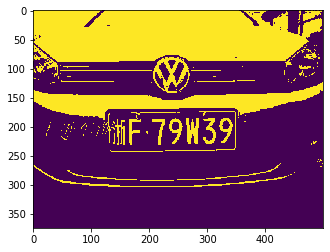

In [113]:
# 原图
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img = thresh
plt.imshow(img)

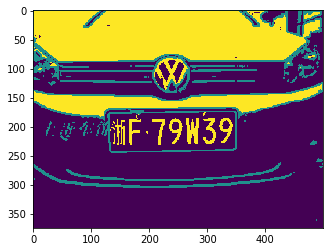

In [114]:
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img = thresh
contours, hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
img = cv2.drawContours(img,contours,-1,128,2)
plt.imshow(img)

### 7.2. cv2轮廓检测 (Sobel, Scharr, Laplace, Canny)

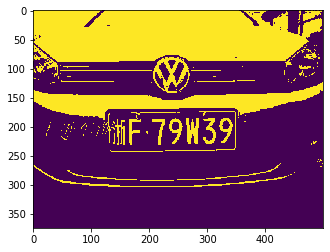

In [115]:
# 原图
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img = thresh
plt.imshow(img)

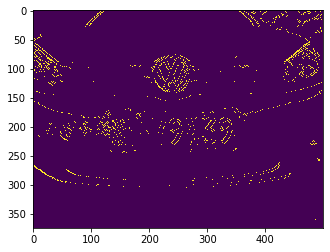

In [116]:
# Sobel
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img = thresh
# img = cv2.Sobel(img, cv2.CV_8U, 0, 1) # 对y阶一阶差分
# img = cv2.Sobel(img, cv2.CV_8U, 1, 0) # 对x阶一阶差分
img = cv2.Sobel(img, cv2.CV_8U, 1, 1) # 对x,y阶一阶差分
plt.imshow(img)

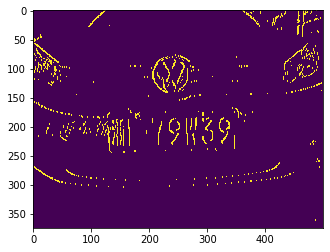

In [117]:
# Scharr
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img = thresh
# img = cv2.Scharr(img, cv2.CV_8U, 0, 1) # 对y阶一阶差分
img = cv2.Scharr(img, cv2.CV_8U, 1, 0) # 对x阶一阶差分
plt.imshow(img)

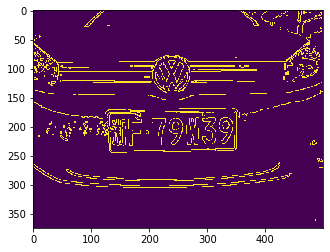

In [118]:
# Laplacian
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img = thresh
img = cv2.Laplacian(img, cv2.CV_8U, ksize=3)
plt.imshow(img)

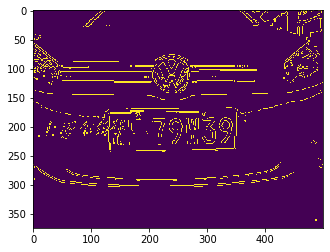

In [119]:
# Canny
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img = thresh
img = cv2.Canny(img,0,255)
plt.imshow(img)

### 8. 图像的腐蚀和膨胀
    腐蚀: 去除毛边
    膨胀: 扩张白边

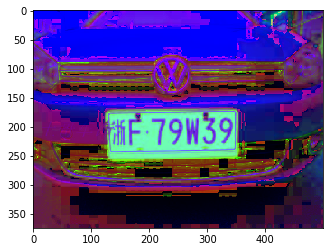

In [120]:
# 原图
img = cv2.imread(image_dir)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img)

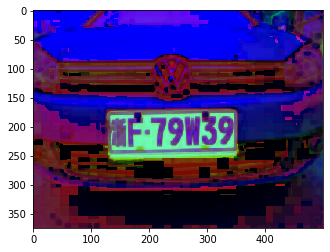

In [121]:
# 腐蚀操作
img = cv2.imread(image_dir)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
kernel = np.ones((5, 5), np.uint8)
img = cv2.erode(img, kernel, iterations=1)
plt.imshow(img)

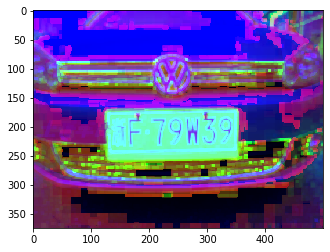

In [122]:
# 膨胀操作
img = cv2.imread(image_dir)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
kernel = np.ones((5, 5), np.uint8)
img = cv2.dilate(img, kernel, iterations=1)
plt.imshow(img)

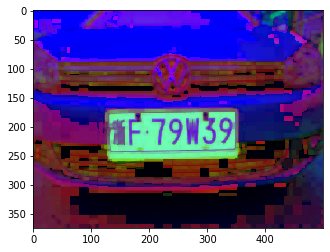

In [123]:
# 将车牌图片腐蚀膨胀各一次
img = cv2.imread(image_dir)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
kernel = np.ones((5, 5), np.uint8)
img = cv2.erode(img, kernel, iterations=1)
img = cv2.dilate(img, kernel, iterations=1)
plt.imshow(img)

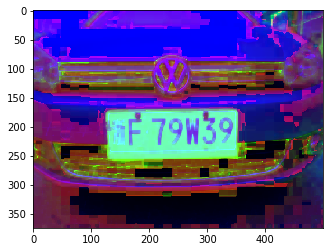

In [129]:
# 将车牌图片膨胀腐蚀各一次
img = cv2.imread(image_dir)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
kernel = np.ones((5, 5), np.uint8)
img = cv2.dilate(img, kernel, iterations=1)
img = cv2.erode(img, kernel, iterations=1)
plt.imshow(img)

### 9. cv2开闭运算
    cv2.MORPH_OPEN: 开运算, 先进行腐蚀、再进行膨胀
    cv2.MORPH_CLOSE 闭运算, 先进行膨胀、再进行腐蚀

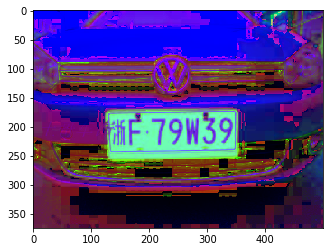

In [124]:
img = cv2.imread(image_dir)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img)

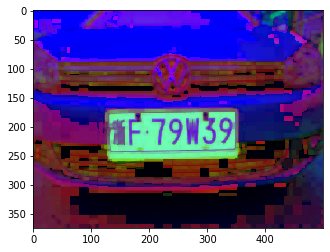

In [125]:
# 开运算
img = cv2.imread(image_dir)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
kernel = np.ones((5, 5), np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.imshow(img)

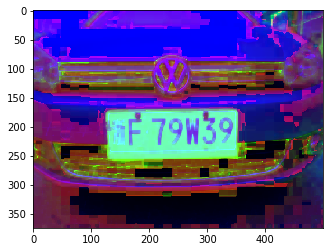

In [126]:
# 闭运算
img = cv2.imread(image_dir)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
kernel = np.ones((5, 5), np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.imshow(img)

### 10. cv2滤波, 使图像变得平滑

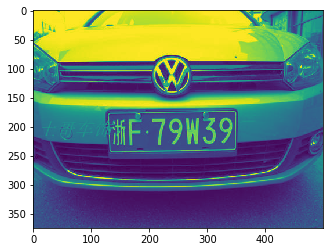

In [153]:
# 原图
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

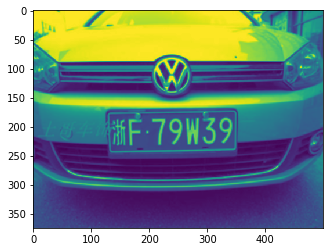

In [161]:
# 均值滤波
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel=np.ones((3,3),np.float32)/9
img=cv2.filter2D(img,cv2.CV_8U,kernel)
plt.imshow(img)

In [ ]:
# 高斯滤波 GaussianBlur()

### 11. cv2分水岭watershed

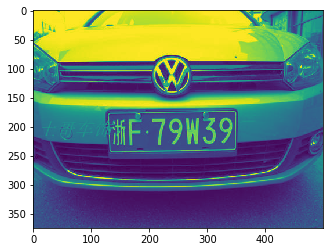

In [16]:
# 原图
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

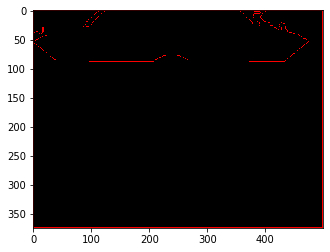

In [30]:
# 使用分水岭

# 初始灰度图
img = cv2.imread(image_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Otsu二值化
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# 开运算降噪
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,2)

# 得到背景区域
sure_bg = cv2.dilate(opening,kernel,3)

# 得到前景区域
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# 得到未知区域
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# 标记前景区域
ret,markers = cv2.connectedComponents(sure_fg)

# 标记背景区域为1
markers = markers + 1

# 标记未知区域为0
markers[unknown == 255] = 0

# 使用watershed
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

# 制作一张纯黑图片
blank_img = np.zeros((375,500,3),dtype = np.uint8)

# 得到watershed纹理
blank_img[markers == -1] = [255,0,0]

plt.imshow(img)
plt.imshow(blank_img)


## Apply: Car Plate Rec

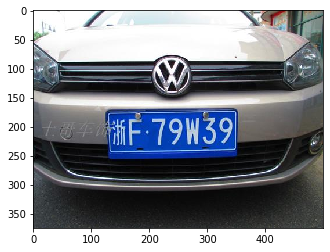

In [6]:
# 图片读取
img = cv2.imread(image_dir)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

image shape: (300, 400, 3)


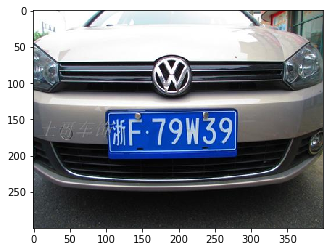

In [7]:
# 图片resize
r = 400*img.shape[0]/img.shape[1]
img=cv2.resize(img,(400,int(r)),interpolation=cv2.INTER_CUBIC)
print('image shape: %s'%str(img.shape))
plt.imshow(img)

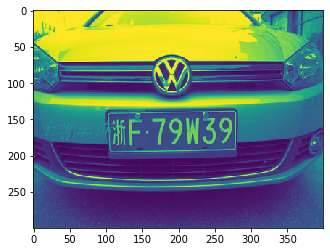

In [8]:
# 灰度拉伸
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img)
maxi=float(gray_img.max())
mini=float(gray_img.min())
for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        gray_img[i,j]=(255/(maxi-mini)*gray_img[i,j]-(255*mini)/(maxi-mini))
plt.imshow(gray_img)

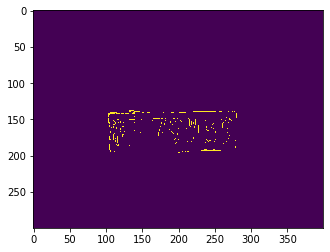

In [9]:
# HSV图片二值化
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lower = np.array([110, 100, 150])
upper = np.array([125, 200, 255])
hsv_img = cv2.inRange(hsv_img, lowerb=lower, upperb=upper) # 将 <lower的值变为0 and >upper的值变为0
plt.imshow(hsv_img)

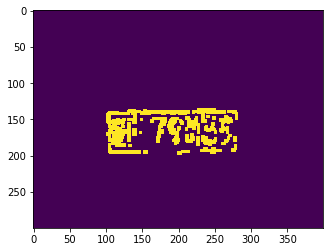

In [10]:
# 膨胀一次
kernel = np.ones((5,5), np.uint8)
hsv_img = cv2.dilate(hsv_img, kernel, iterations=1)
plt.imshow(hsv_img)

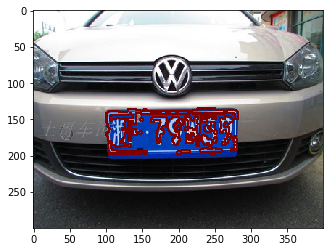

In [11]:
# contours找寻边界
contours, hier = cv2.findContours(hsv_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    # cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) # 画出矩形
img = cv2.drawContours(img,contours,-1,128,2)
plt.imshow(img)

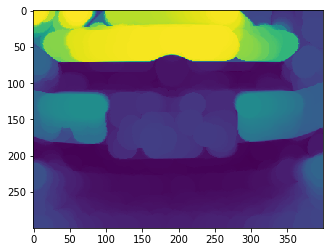

In [12]:
r=16
h=w=r*2+1
kernel=np.zeros((h,w),np.uint8)
cv2.circle(kernel,(r,r),r,1,-1)
# 开运算
open_img = cv2.morphologyEx(gray_img,cv2.MORPH_OPEN,kernel)
plt.imshow(open_img)

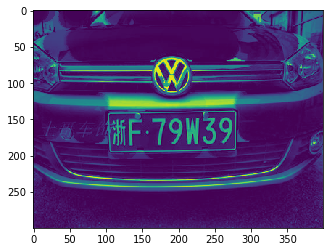

In [13]:
# 获取差分图
shift_img=cv2.absdiff(gray_img,open_img)
plt.imshow(shift_img)

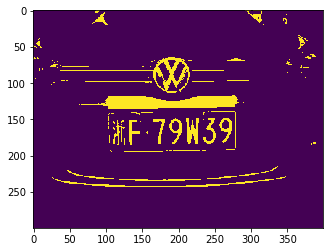

In [14]:
maxi=float(shift_img.max())
mini=float(shift_img.min())
x=maxi-((maxi-mini)/2)
#二值化,返回阈值ret  和  二值化操作后的图像thresh
ret,thresh=cv2.threshold(shift_img,x,255,cv2.THRESH_BINARY)
bn_img = thresh
plt.imshow(bn_img)

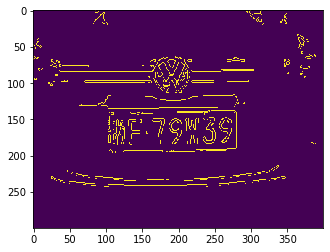

In [15]:
cany_img =cv2.Canny(bn_img,bn_img.shape[0],bn_img.shape[1])
plt.imshow(cany_img)

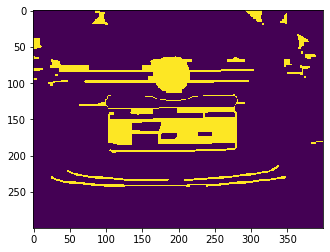

In [16]:
#进行闭运算
kernel=np.ones((5,19),np.uint8)
close_img=cv2.morphologyEx(cany_img,cv2.MORPH_CLOSE,kernel)
plt.imshow(close_img)

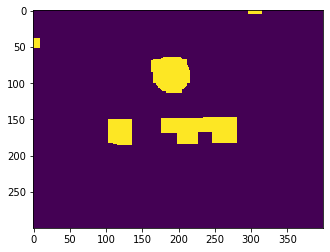

In [17]:
open_img = cv2.morphologyEx(close_img,cv2.MORPH_OPEN,kernel)
kernel=np.ones((11,5),np.uint8)
open_img=cv2.morphologyEx(open_img,cv2.MORPH_OPEN,kernel)
plt.imshow(open_img)

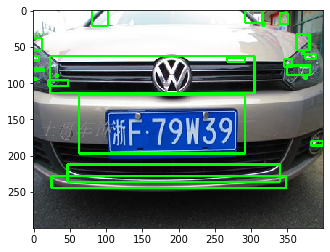

In [18]:
img = cv2.imread(image_dir)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
r = 400*img.shape[0]/img.shape[1]
img=cv2.resize(img,(400,int(r)),interpolation=cv2.INTER_CUBIC)
# contours找寻边界
contours, hier = cv2.findContours(close_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
#     if w < 2*h:
#         continue
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) # 画出矩形
plt.imshow(img)

In [19]:
block = []
contours, hier = cv2.findContours(close_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    y,x = [],[]
    for p in c:
        y.append(p[0][0])
        x.append(p[0][1])
    r = [min(y),min(x),max(y),max(x)]
    a=(r[2]-r[0])*(r[3]-r[1])   #面积
    s=(r[2]-r[0])*(r[3]-r[1])   #长度比
    block.append([r,s,a])
# 选出面积最大的3个区域
block=sorted(block,key=lambda b: b[1])[-3:]

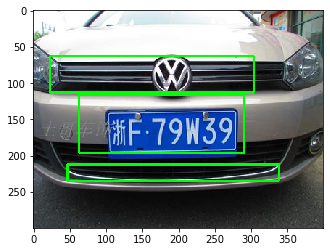

In [21]:
img = cv2.imread(image_dir)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
r = 400*img.shape[0]/img.shape[1]
img=cv2.resize(img,(400,int(r)),interpolation=cv2.INTER_CUBIC)
for b in block:
    x = b[0][0]
    y = b[0][1]
    w = b[0][2] - x
    h = b[0][3] - y
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(img)

2
[63, 116, 291, 196]


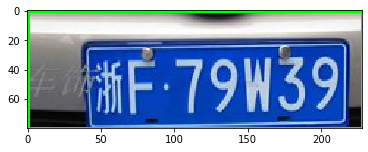

In [25]:
# 根据颜色判断最像车牌区域
maxweight,maxindex=0,-1
for i,b in enumerate(block):
    x = b[0][0]
    y = b[0][1]
    w = b[0][2] - x
    h = b[0][3] - y
    temp_img = img[y:y+h,x:x+w]
    temp_hsv = cv2.cvtColor(temp_img,cv2.COLOR_RGB2HSV)
    lower=np.array([100,50,50])
    upper=np.array([140,255,255])
    mask=cv2.inRange(temp_hsv,lower,upper)
    #统计权值
    w1=0
    for m in mask:
        w1+=m/255
    w2=0
    for n in w1:
        w2+=n
    #选出最大权值的区域
    if w2>maxweight:
        maxindex=i
        maxweight=w2
print(maxindex)
print(block[maxindex][0])
x = block[maxindex][0][0]
y = block[maxindex][0][1]
w = block[maxindex][0][2] - x
h = block[maxindex][0][3] - y
res_img = img[y:y+h,x:x+w]
plt.imshow(res_img)

### 注释: 
    这只是一种方法，且二值化时设定的阈值是根据车牌底色为蓝色设定的
### 思考: 
    1.如果车辆底色与车牌底色相近, 是否可能导致识别结果的错误, 需要通过什么方式解决
    2.其他颜色车牌(黑色、黄色、新能源色、以及一些特殊车牌的识别)